In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data (run this once)
nltk.download('stopwords')
nltk.download('wordnet')

# Load the datasets
try:
    true_news = pd.read_csv('C://Users//HP//Downloads//archive (2)//True.csv')
    fake_news = pd.read_csv('C://Users//HP//Downloads//archive (2)//Fake.csv')
except FileNotFoundError:
    print("Error: Make sure 'True.csv' and 'Fake.csv' are in the same directory.")
    exit()

# Add a 'label' column to each dataframe
true_news['label'] = 0  # 0 for true news
fake_news['label'] = 1  # 1 for fake news

# Merge the datasets
news_df = pd.concat([true_news, fake_news], ignore_index=True)

# Shuffle the dataframe
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)
print("Data loading and merging complete.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data loading and merging complete.


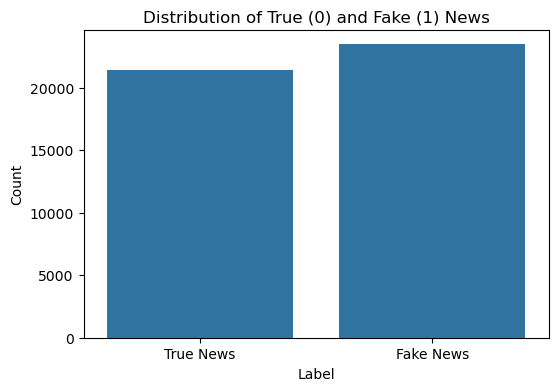

Text preprocessing and EDA complete.


In [2]:
# Text Preprocessing Function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'text' column
news_df['text'] = news_df['text'].apply(preprocess_text)

# Check class distribution 
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=news_df)
plt.title('Distribution of True (0) and Fake (1) News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['True News', 'Fake News'])
plt.show()
print("Text preprocessing and EDA complete.")

In [3]:
# Split data into features (X) and labels (y)
X = news_df['text']
y = news_df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("TF-IDF vectorization and data splitting complete.")

TF-IDF vectorization and data splitting complete.



--- Logistic Regression Performance ---
Training Data Accuracy (80%): 0.9920
Testing Data Accuracy (20%): 0.9879

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.99      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



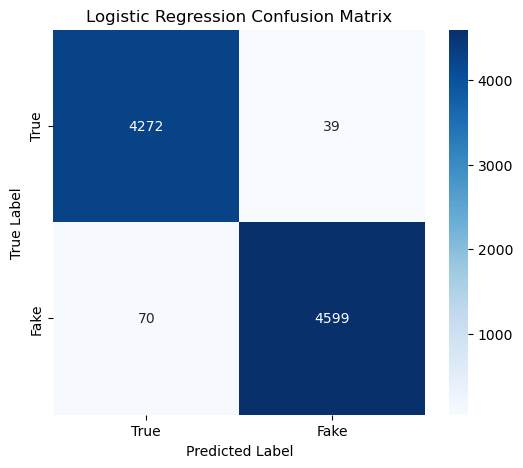

In [4]:
# --- Logistic Regression Model ---
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# --- Performance Evaluation ---
# Predict on both training and testing data
y_pred_train = log_reg.predict(X_train_tfidf)
y_pred_test = log_reg.predict(X_test_tfidf)

# Calculate individual accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("\n--- Logistic Regression Performance ---")
print(f"Training Data Accuracy (80%): {train_accuracy:.4f}")
print(f"Testing Data Accuracy (20%): {test_accuracy:.4f}")

# Classification Report on Test Data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for Test Data
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [7]:
def predict_news(sentence):
    """
    Takes a single sentence and predicts whether it's fake or true news.
    """
    # 1. Preprocess the sentence
    cleaned_sentence = preprocess_text(sentence)

    # 2. Vectorize using the fitted TF-IDF Vectorizer
    vectorized_sentence = tfidf_vectorizer.transform([cleaned_sentence])

    # 3. Make the prediction
    prediction = log_reg.predict(vectorized_sentence)[0]

    # 4. Return a human-readable result
    if prediction == 0:
        return "This news is classified as **TRUE**."
    else:
        return "This news is classified as **FAKE**."

# Example Usage
print("\n--- Real-Time Prediction ---")
user_input = input("Enter a sentence to classify as fake or true news: ")
result = predict_news(user_input)
print(result)


--- Real-Time Prediction ---


Enter a sentence to classify as fake or true news:  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trumpâ€™s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trumpâ€™s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said. That will be followed 

This news is classified as **TRUE**.
